In [205]:
import os

import cv2
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import img_to_array

from sklearn.metrics import classification_report

## Load trained model weights

In [206]:
model = load_model('best_c10_weights.hdf5')
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)      

In [207]:
image_original = cv2.imread('sample.png')
image_original = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)

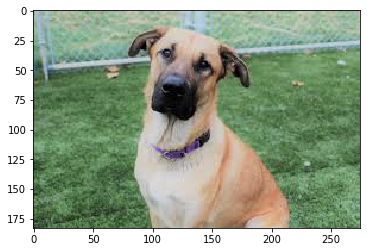

In [208]:
plt.imshow(image_original)

In [209]:
def preprocess(image):
    ''' Preprocess an image (resizeing, extracting patches/crops...) '''
    if image is not None:
        # Resize the image
        image = cv2.resize(image, (32, 32), interpolation = cv2.INTER_AREA)
        # Transform image to array
        image = img_to_array(image, data_format=None)
        # Add one extra dimension
        image = np.expand_dims(image, axis=0)
        # Normalize [0, 1]
        image = image.astype('float') / 255.0

        return image

In [210]:
image = preprocess(image_original)

In [211]:
print(image)

[[[[0.62745098 0.71764706 0.71764706]
   [0.62745098 0.74509804 0.69019608]
   [0.64313725 0.7254902  0.60784314]
   ...
   [0.67058824 0.74509804 0.63529412]
   [0.58823529 0.72156863 0.61176471]
   [0.61960784 0.71764706 0.64313725]]

  [[0.62352941 0.71372549 0.72156863]
   [0.60392157 0.70588235 0.68235294]
   [0.63921569 0.70588235 0.60392157]
   ...
   [0.6627451  0.7372549  0.65882353]
   [0.61176471 0.73333333 0.63529412]
   [0.62745098 0.72941176 0.62745098]]

  [[0.61176471 0.71372549 0.68627451]
   [0.58039216 0.70196078 0.66666667]
   [0.58039216 0.71764706 0.61176471]
   ...
   [0.6627451  0.74901961 0.65882353]
   [0.61176471 0.71764706 0.62352941]
   [0.63529412 0.7254902  0.63529412]]

  ...

  [[0.29019608 0.42352941 0.25490196]
   [0.30196078 0.41960784 0.25882353]
   [0.34117647 0.49803922 0.3254902 ]
   ...
   [0.39607843 0.55686275 0.38039216]
   [0.44705882 0.60784314 0.43921569]
   [0.44705882 0.60784314 0.45490196]]

  [[0.23137255 0.34509804 0.21568627]
   [0.2

In [217]:
# Set labels names for easier reading
label_names = ['Airplane', 'Automobile', 'Bird',
              'Cat', 'Deer', 'Dog', 'Frog',
              'Horse', 'Ship', 'Truck']

preds = model.predict(image)
predicted = preds.argmax(axis=1)
print('Predicted:', preds, predicted)

Predicted: [[1.6346292e-05 1.7261906e-06 2.0492817e-03 5.2826326e-02 4.0316475e-03
  9.3123949e-01 4.5918653e-04 8.6331973e-03 4.6337204e-04 2.7932852e-04]] [5]


In [213]:
cv2.putText(image_original, f'Label: {label_names[predicted[0]]}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

array([[[145, 170, 148],
        [159, 183, 169],
        [174, 195, 198],
        ...,
        [149, 171, 159],
        [156, 176, 165],
        [162, 182, 171]],

       [[139, 164, 142],
        [155, 179, 165],
        [172, 193, 196],
        ...,
        [158, 176, 164],
        [167, 180, 170],
        [173, 186, 177]],

       [[137, 162, 140],
        [152, 176, 162],
        [169, 190, 195],
        ...,
        [170, 180, 169],
        [181, 182, 174],
        [186, 187, 181]],

       ...,

       [[ 48,  72,  48],
        [ 51,  75,  51],
        [ 65,  89,  63],
        ...,
        [ 98, 139,  95],
        [104, 145, 101],
        [109, 150, 106]],

       [[ 78, 100,  77],
        [ 62,  86,  62],
        [ 69,  93,  69],
        ...,
        [ 88, 129,  85],
        [ 98, 139,  95],
        [111, 152, 108]],

       [[ 34,  53,  33],
        [ 18,  40,  17],
        [ 39,  61,  38],
        ...,
        [ 82, 123,  79],
        [ 94, 135,  93],
        [108, 149, 107]]

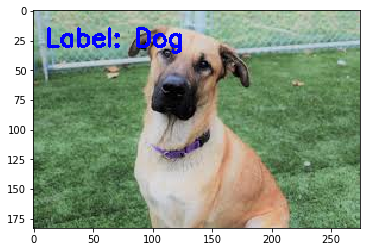

In [214]:
plt.imshow(image_original)

## Visualize activations

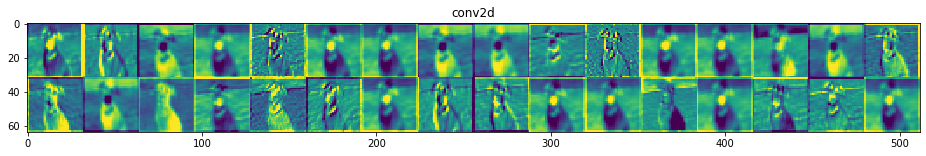

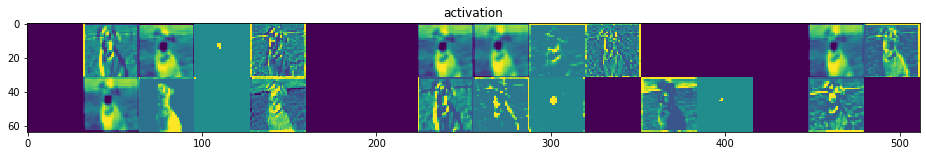

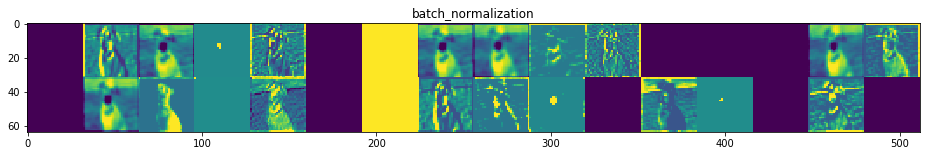

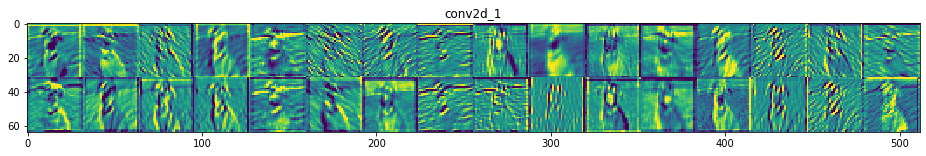

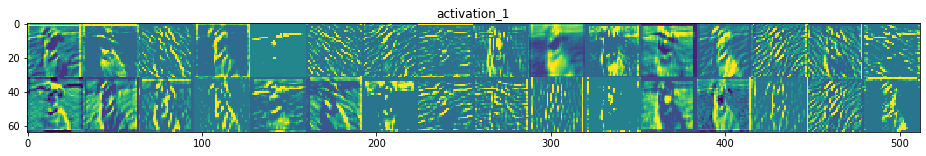

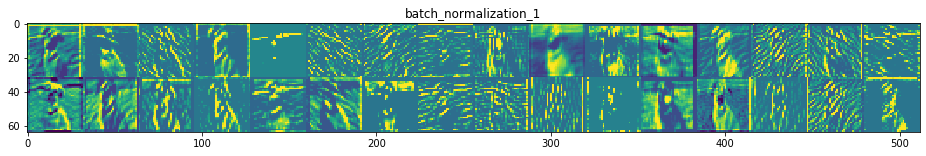

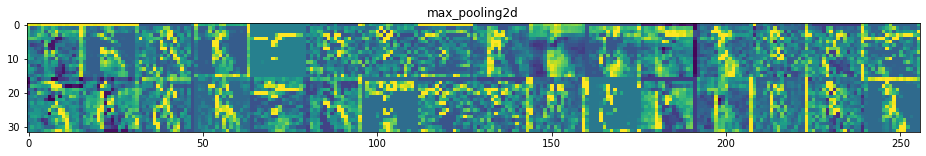

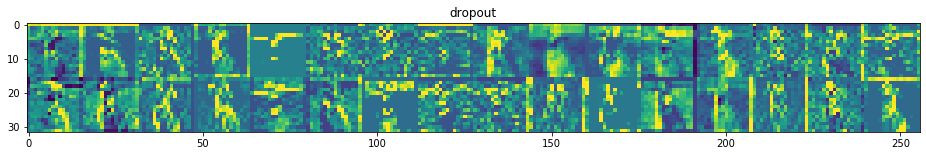

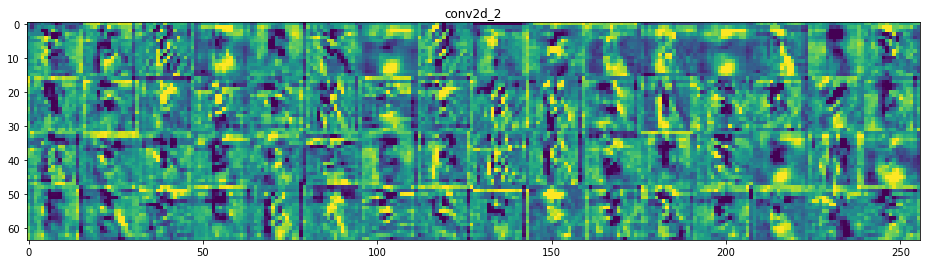

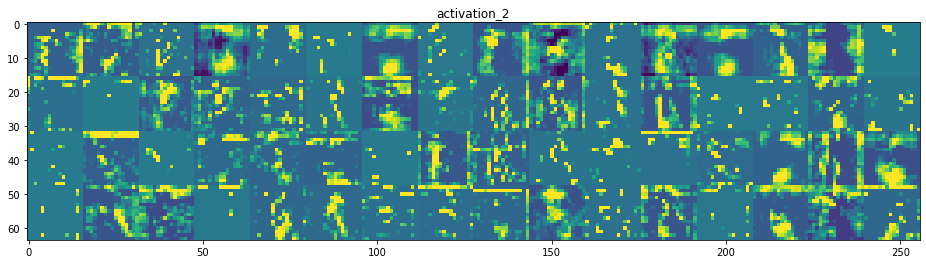

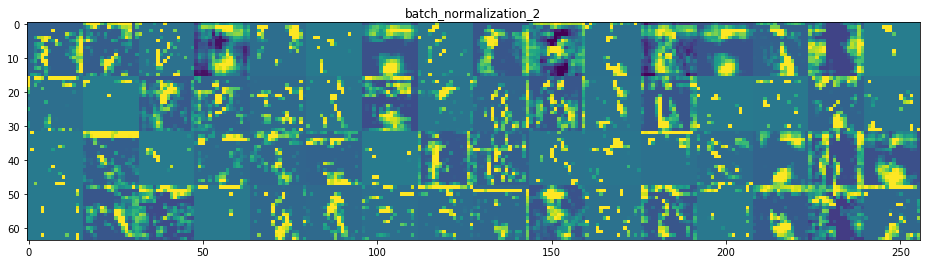

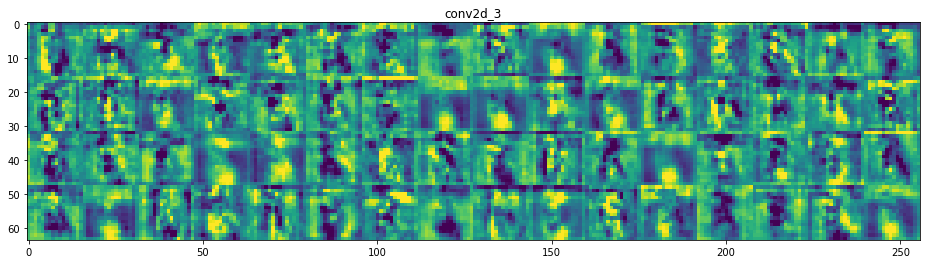

In [215]:
# Credits @ https://github.com/gabrielpierobon/cnnshapes/blob/master/README.md
%matplotlib inline

layer_outputs = [layer.output for layer in model.layers[:12]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(image)

layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')